In [2]:
import random
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F
from torch.nn.functional import one_hot
from torch.utils.data import Dataset, TensorDataset, DataLoader, WeightedRandomSampler, SubsetRandomSampler, random_split, Subset
from torchvision.transforms import Compose, ToTensor, Normalize, ToPILImage, RandomHorizontalFlip, Resize, transforms

from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

PATH = "../data/shrooms/"
torch.manual_seed(13)

In [3]:
%run -i ../datapreparation_train/dataprep_v1.py

Generated train_loader and val_loader


In [4]:
train_loader.dataset[0]

(tensor([[[ 0.1922,  0.2157,  0.5373,  ..., -0.0196,  0.1216,  0.0902],
          [-0.0196,  0.0980,  0.3647,  ..., -0.0902,  0.1529,  0.1294],
          [-0.2078, -0.0275,  0.1765,  ...,  0.0039,  0.2000,  0.1843],
          ...,
          [ 0.2706,  0.1686,  0.0980,  ..., -0.0196,  0.0118,  0.0667],
          [-0.0118, -0.0667, -0.1922,  ...,  0.0824,  0.0510,  0.0588],
          [-0.1451, -0.1608, -0.3255,  ...,  0.2863,  0.2471,  0.1529]],
 
         [[ 0.7020,  0.5451,  0.6941,  ...,  0.2627,  0.3176,  0.2078],
          [ 0.6392,  0.5059,  0.6078,  ...,  0.2627,  0.4118,  0.2627],
          [ 0.3725,  0.3882,  0.5059,  ...,  0.3882,  0.4980,  0.3412],
          ...,
          [ 0.3725,  0.2784,  0.1843,  ..., -0.0588, -0.0196,  0.0510],
          [ 0.0745,  0.0275, -0.1137,  ...,  0.0118, -0.0039,  0.0196],
          [-0.0745, -0.0902, -0.2706,  ...,  0.2706,  0.2392,  0.1294]],
 
         [[ 0.7412,  0.6471,  0.7804,  ..., -0.5686, -0.5216, -0.5529],
          [ 0.7098,  0.6627,

In [5]:
# in_channels = 3

# CNNmodel_v1 = nn.Sequential()
# CNNmodel_v1.add_module('conv1', nn.Conv2d(
#     in_channels=in_channels,out_channels=16, kernel_size=3
# ))
# CNNmodel_v1.add_module('relu1', nn.ReLU())
# CNNmodel_v1.add_module('maxp1', nn.MaxPool2d(kernel_size=4))
# CNNmodel_v1.add_module('conv2', nn.Conv2d(
#     in_channels=16, out_channels=32, kernel_size=3
# ))
# CNNmodel_v1.add_module('relu2', nn.ReLU())
# CNNmodel_v1.add_module('maxp2', nn.MaxPool2d(kernel_size=4))
# CNNmodel_v1.add_module('flatten', nn.Flatten())
# print(CNNmodel_v1)

In [6]:
# num_classes = 215

# CNNmodel_v1.add_module('fc1', nn.Linear(32 * 13* 13, 64))
# CNNmodel_v1.add_module('relu3', nn.ReLU())
# CNNmodel_v1.add_module('fc2', nn.Linear(64, num_classes))

# print(CNNmodel_v1)


In [7]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 28 * 28, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x

# Instantiate the model
num_classes = 215
CNNmodel_v1 = CNNModel(num_classes)


In [8]:
lr = 0.001
multi_loss_fn = nn.CrossEntropyLoss(reduction='mean')
optimizer_cnn1 = optim.Adam(CNNmodel_v1.parameters(), lr=lr)

In [9]:
from sbsv1 import StepByStep

sbs_cnn = StepByStep(CNNmodel_v1, multi_loss_fn, optimizer_cnn1)
sbs_cnn.set_loaders(train_loader, val_loader)

In [10]:
sbs_cnn.train(20)

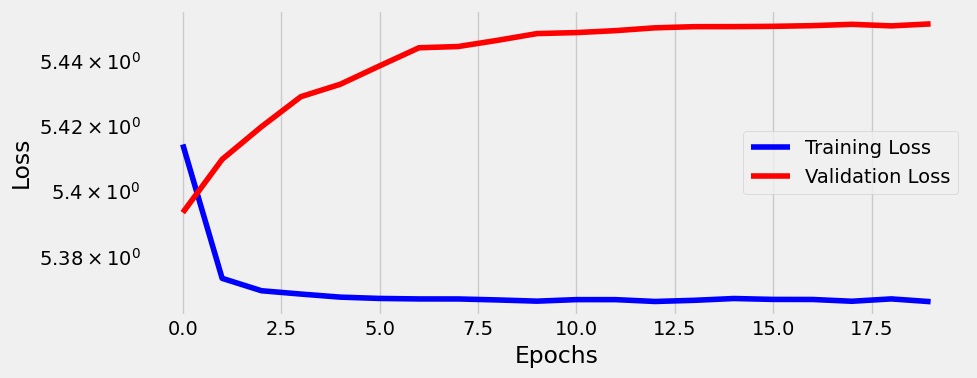

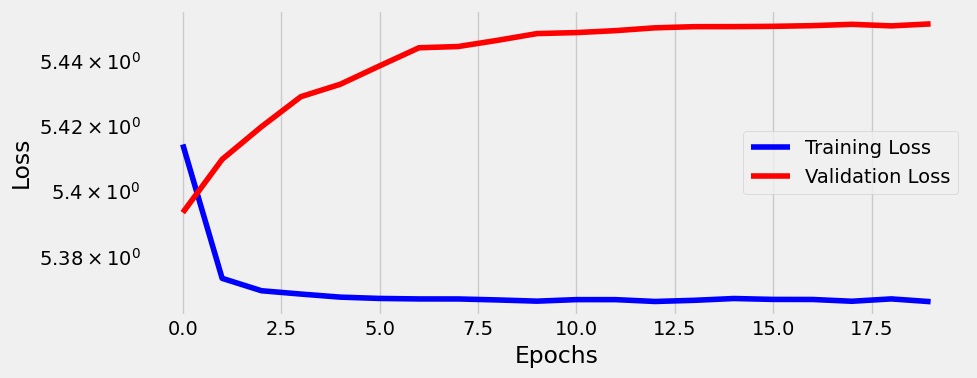

In [ ]:
sbs_cnn.plot_losses()

In [ ]:
sbs_cnn.losses

[5.414246587868196,
 5.373414654329599,
 5.369644532720726,
 5.368638256946242,
 5.367707097386739,
 5.3673085476978715,
 5.367159228727042,
 5.367151559117329,
 5.366851933031197,
 5.3664843088173,
 5.366951172610364,
 5.366945829736181,
 5.366387683224965,
 5.366740686347685,
 5.367286234016878,
 5.3670134199671,
 5.36699473714254,
 5.366452808839729,
 5.367169885750276,
 5.366321695856302]